In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import lightgbm as lgb
sns.set(style='white')
from sklearn.model_selection import RandomizedSearchCV
from playsound import playsound

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
df=pd.read_csv('Product Training and Testing.csv')

In [3]:
df.head()

,Identifier,Product Selection,Product_Activation,R_rank_norm,F_rank_norm,M_rank_norm,M2_rank_norm,RFM_Score,RFM2_Score,Customer_segment,...,ENT_OCCUPATION_Professional,ENT_OCCUPATION_Public,ENT_OCCUPATION_Retired,ENT_OCCUPATION_Student,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_70+
0,110354,1,0,34,68,37,68,45,63,1,...,0,0,0,0,0,0,0,1,0,0
1,110355,1,0,83,24,19,53,30,49,1,...,0,0,0,0,0,1,0,0,0,0
2,110357,1,0,62,55,53,59,55,58,2,...,0,0,0,0,0,1,0,0,0,0
3,110358,1,0,85,24,19,53,30,50,1,...,0,0,0,0,1,0,0,0,0,0
4,110359,1,0,58,73,82,77,76,73,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df=df.drop(columns='Identifier')

In [5]:
df.Product_Activation.value_counts()

0    645822
1     43231
Name: Product_Activation, dtype: int64

In [6]:
df.isnull().sum()

Product Selection               0
Product_Activation              0
R_rank_norm                     0
F_rank_norm                     0
M_rank_norm                     0
M2_rank_norm                    0
RFM_Score                       0
RFM2_Score                      0
Customer_segment                0
Customer_segment2               0
ENT_SEX_F                       0
ENT_SEX_M                       0
ENT_SEX_Other                   0
ENT_MARITAL_STATUS_M            0
ENT_MARITAL_STATUS_Other        0
ENT_MARITAL_STATUS_U            0
ENT_OCCUPATION_Government       0
ENT_OCCUPATION_Housewife        0
ENT_OCCUPATION_Other            0
ENT_OCCUPATION_PUBLIC SECTOR    0
ENT_OCCUPATION_Private          0
ENT_OCCUPATION_Professional     0
ENT_OCCUPATION_Public           0
ENT_OCCUPATION_Retired          0
ENT_OCCUPATION_Student          0
age_range_18-29                 0
age_range_30-39                 0
age_range_40-49                 0
age_range_50-59                 0
age_range_60-6

In [7]:
df.Product_Activation.value_counts()[0]/df.Product_Activation.value_counts()[1]

14.938863315676251

#### Data ratio is 15:1 which is highly imbalanced

In [8]:
import numpy as np
a=np.random.choice(df[df.Product_Activation==0].index,
                   size=len(df[df.Product_Activation==1]),replace=False)

In [9]:
undersampled_df_zero=pd.DataFrame(df,index=a)

#### Random Undersampling performed with Numpy random function to balance the data

In [10]:
undersampled_df_zero

,Product Selection,Product_Activation,R_rank_norm,F_rank_norm,M_rank_norm,M2_rank_norm,RFM_Score,RFM2_Score,Customer_segment,Customer_segment2,...,ENT_OCCUPATION_Professional,ENT_OCCUPATION_Public,ENT_OCCUPATION_Retired,ENT_OCCUPATION_Student,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_70+
420897,1,0,53,55,9,26,28,38,1,1,...,0,0,0,1,1,0,0,0,0,0
28532,1,0,99,55,31,83,48,78,1,0,...,0,0,0,0,0,1,0,0,0,0
565962,0,0,98,64,64,26,69,48,2,1,...,0,0,0,0,0,1,0,0,0,0
60969,0,0,48,24,31,54,32,44,1,1,...,0,0,0,0,1,0,0,0,0,0
135145,1,0,2,87,92,95,77,79,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131052,1,0,77,24,9,59,23,52,1,2,...,0,0,0,0,1,0,0,0,0,0
162006,1,0,48,68,72,84,67,74,2,2,...,0,0,0,0,0,1,0,0,0,0
217991,1,0,21,55,54,87,49,68,1,2,...,0,0,0,0,0,1,0,0,0,0
590368,1,0,42,24,9,26,18,28,1,1,...,0,0,0,1,1,0,0,0,0,0


In [11]:
undersampled_df=pd.concat([df[df.Product_Activation==1],undersampled_df_zero], axis=0, ignore_index=True)

In [12]:
undersampled_df.Product_Activation.value_counts()

1    43231
0    43231
Name: Product_Activation, dtype: int64

In [13]:
X=undersampled_df.drop(columns=['Product Selection','Product_Activation'])
Y=undersampled_df.Product_Activation

#### Trying ADABoost classifier

In [14]:
ada_model=AdaBoostClassifier()

In [15]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,random_state=42)

In [16]:
ada_model.fit(xTrain,yTrain)

AdaBoostClassifier()

In [17]:
ada_model.predict(xTest)

array([0, 0, 1, ..., 0, 1, 1])

In [18]:
confusion_matrix(ada_model.predict(xTest),yTest)

array([[8830,  938],
       [1924, 9924]])

In [19]:
ada_model.score(xTest,yTest)

0.8675980754996299

In [20]:
metrics.f1_score(yTest,ada_model.predict(xTest))

0.8739762219286658

In [21]:
cv_ori=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(ada_model, X, Y, scoring=scoring, cv=cv_ori, n_jobs=-1)

In [22]:
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

Mean Accuracy: 0.8666
Mean Precision: 0.8695
Mean Recall: 0.8666


#### Trying LGBM classifier

In [23]:
lgbm_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(xTrain,yTrain,eval_set=[(xTest,yTest),(xTrain,yTrain)],
          verbose=20,eval_metric='logloss')

/home/vikrant/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.325469	valid_0's binary_logloss: 0.328896
[40]	training's binary_logloss: 0.289486	valid_0's binary_logloss: 0.296272
[60]	training's binary_logloss: 0.281208	valid_0's binary_logloss: 0.291776
[80]	training's binary_logloss: 0.276927	valid_0's binary_logloss: 0.290911
[100]	training's binary_logloss: 0.273585	valid_0's binary_logloss: 0.29077


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [24]:
lgbm_model.score(xTest,yTest)

0.8719929681717247

In [25]:
metrics.f1_score(yTest,lgbm_model.predict(xTest))

0.8776151090273784

#### Trying RandomForest Classifier

In [26]:
randomF_model=RandomForestClassifier(n_estimators=50,max_depth=10)

In [27]:
randomF_model.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [28]:
randomF_model.score(xTest,yTest)

0.8703275351591414

In [29]:
metrics.f1_score(yTest,randomF_model.predict(xTest))

0.875814097736033

#### Random forest confusion matrix

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


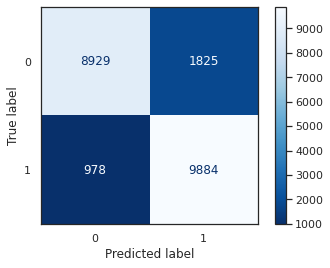

In [30]:
_=metrics.plot_confusion_matrix(randomF_model,xTest,yTest,cmap='Blues_r')

#### AdaBoost confusion matrix

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


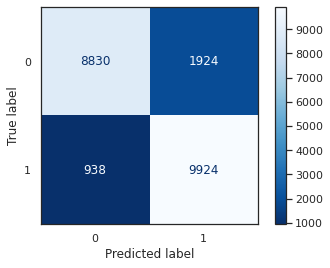

In [31]:
_=metrics.plot_confusion_matrix(ada_model,xTest,yTest,cmap='Blues_r')

#### LGBM confusion matrix

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


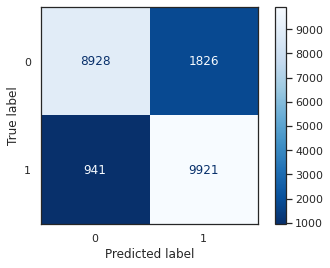

In [32]:
_=metrics.plot_confusion_matrix(lgbm_model,xTest,yTest,cmap='Blues_r')

#### Results comparison

In [35]:
print('f1 score of LGBM:',metrics.f1_score(yTest,lgbm_model.predict(xTest)))
print('f1 score of Adaboost:',metrics.f1_score(yTest,ada_model.predict(xTest)))
print('f1 score of RandomForest:',metrics.f1_score(yTest,randomF_model.predict(xTest)))

f1 score of LGBM: 0.8776151090273784
f1 score of Adaboost: 0.8739762219286658
f1 score of RandomForest: 0.875814097736033


In [36]:
prop_df=pd.DataFrame(zip(lgbm_model.predict(xTest),round(pd.DataFrame(lgbm_model.predict_proba(xTest))[1]*100,2)),columns=['Product_Activation','Propensity'])

In [37]:
prop_df

,Product_Activation,Propensity
0,0,3.76
1,0,0.01
2,1,83.38
3,1,82.63
4,0,0.63
...,...,...
21611,1,72.24
21612,1,83.81
21613,1,56.69
21614,1,96.17


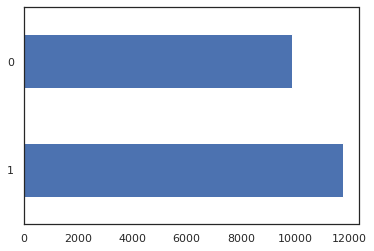

In [38]:
_=prop_df.Product_Activation.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='Propensity', ylabel='Count'>

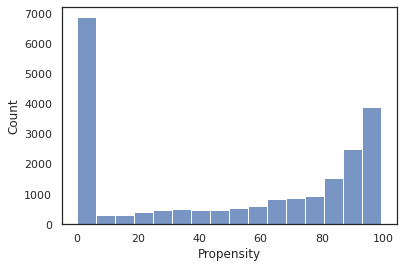

In [39]:
sns.histplot(prop_df.Propensity)

#### Grid search for the best parameters of selected LGBM model

In [40]:
parameters={'learning_rate':np.arange(0.1,15.0,0.1),
            'max_depth':range(-100,-1,2),
            'n_estimators': range(1,100,2)}

In [41]:
parameters={'learning_rate':np.arange(0.001,1.0,0.002),'max_depth':range(-50,-1,1),"bagging_freq": range(1,5,1), "bagging_fraction": np.arange(0.1,0.75,0.05)}

In [42]:
grid=RandomizedSearchCV(estimator=lgbm_model,param_distributions=parameters, 
                        n_iter = 100, cv = 3, verbose = 1, random_state = 42, 
                               n_jobs = -1).fit(xTrain,yTrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.20000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20000000000000004
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.45000000000000007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45000000000000007
[LightGBM] [Warni

[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.20000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20000000000000004
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Cu

[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Cu

[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.25000000000000006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.25000000000000006
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7000000000000002
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.45000000000000007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45000000000000007
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Curr

[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.7000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7000000000000002
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.45000000000000007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45000000000000007
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Curr

In [43]:
grid.best_params_

{'max_depth': -41,
 'learning_rate': 0.049,
 'bagging_freq': 4,
 'bagging_fraction': 0.3500000000000001}

In [44]:
lgbm_model=lgb.LGBMClassifier(max_depth=-19,bagging_freq=2,bagging_fraction=0.65,learning_rate=0.039)
lgbm_model.fit(xTrain,yTrain)

LGBMClassifier(bagging_fraction=0.65, bagging_freq=2, learning_rate=0.039,
               max_depth=-19)

In [45]:
metrics.f1_score(yTest,lgbm_model.predict(xTest))

0.8773313250343331

In [46]:
lgbm_model.predict(xTest)

array([0, 0, 1, ..., 1, 1, 1])

In [47]:
print('LGBM Scores')
print('f1 score:',round(metrics.f1_score(yTest,lgbm_model.predict(xTest))*100,2))
print('Precision score:',round(metrics.precision_score(yTest,lgbm_model.predict(xTest))*100,2))
print('Recall score:',round(metrics.recall_score(yTest,lgbm_model.predict(xTest))*100,2))

LGBM Scores
f1 score: 87.73
Precision score: 84.55
Recall score: 91.16


In [48]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(lgbm_model, xTrain, yTrain, scoring=scoring, cv=cv_ori, n_jobs=-1)

In [49]:
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.8710
Mean Precision: 0.8734
Mean Recall: 0.8711


#### Triyng out smote oversampling to find if this will improve the accuracy

In [50]:
from imblearn.over_sampling import SMOTE
X_train_smt = df.drop(columns=['Product_Activation'])
y_train_smt = df.Product_Activation
smt = SMOTE()
xTrain_smt, yTrain_smt = smt.fit_resample(X_train_smt, y_train_smt)

In [51]:
df_smote=pd.DataFrame(xTrain_smt)

In [52]:
df_smote['Product_Activation']=yTrain_smt

In [53]:
df_smote

,Product Selection,R_rank_norm,F_rank_norm,M_rank_norm,M2_rank_norm,RFM_Score,RFM2_Score,Customer_segment,Customer_segment2,ENT_SEX_F,...,ENT_OCCUPATION_Public,ENT_OCCUPATION_Retired,ENT_OCCUPATION_Student,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_70+,Product_Activation
0,1,34,68,37,68,45,63,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1,1,83,24,19,53,30,49,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,62,55,53,59,55,58,2,2,1,...,0,0,0,0,1,0,0,0,0,0
3,1,85,24,19,53,30,50,1,2,0,...,0,0,0,1,0,0,0,0,0,0
4,1,58,73,82,77,76,73,0,2,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291639,1,25,88,87,26,78,43,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1291640,1,5,97,96,99,83,84,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1291641,1,25,93,95,26,84,45,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1291642,1,25,87,72,81,69,74,2,2,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df_smote.to_csv('dfsmote.csv',index=False)

In [55]:
df_smote['Product_Activation'].value_counts()

0    645822
1    645822
Name: Product_Activation, dtype: int64

In [56]:
df.shape

(689053, 31)

In [57]:
df_smote.columns

Index(['Product Selection', 'R_rank_norm', 'F_rank_norm', 'M_rank_norm',
       'M2_rank_norm', 'RFM_Score', 'RFM2_Score', 'Customer_segment',
       'Customer_segment2', 'ENT_SEX_F', 'ENT_SEX_M', 'ENT_SEX_Other',
       'ENT_MARITAL_STATUS_M', 'ENT_MARITAL_STATUS_Other',
       'ENT_MARITAL_STATUS_U', 'ENT_OCCUPATION_Government',
       'ENT_OCCUPATION_Housewife', 'ENT_OCCUPATION_Other',
       'ENT_OCCUPATION_PUBLIC SECTOR', 'ENT_OCCUPATION_Private',
       'ENT_OCCUPATION_Professional', 'ENT_OCCUPATION_Public',
       'ENT_OCCUPATION_Retired', 'ENT_OCCUPATION_Student', 'age_range_18-29',
       'age_range_30-39', 'age_range_40-49', 'age_range_50-59',
       'age_range_60-69', 'age_range_70+', 'Product_Activation'],
      dtype='object')

#### Checking if dropping column will help to increase score and reduce model complexity

In [58]:
xTri,xTei,yTri,yTei=train_test_split(df_smote.drop(columns=['Product_Activation','Product Selection','R_rank_norm', 'F_rank_norm', 'M_rank_norm',
       'M2_rank_norm', 'RFM_Score','ENT_MARITAL_STATUS_U']),
                                 df_smote.Product_Activation,random_state=42)

In [59]:
lgbm_model=lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(xTri,yTri,eval_set=[(xTei,yTei),(xTri,yTri)],
          verbose=20,eval_metric='logloss')

/home/vikrant/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.286096	valid_0's binary_logloss: 0.286304
[40]	training's binary_logloss: 0.220278	valid_0's binary_logloss: 0.220281
[60]	training's binary_logloss: 0.194373	valid_0's binary_logloss: 0.194346
[80]	training's binary_logloss: 0.184895	valid_0's binary_logloss: 0.184822
[100]	training's binary_logloss: 0.180767	valid_0's binary_logloss: 0.180712


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [60]:
lgbm_model=lgb.LGBMClassifier(max_depth=-19,bagging_freq=2,bagging_fraction=0.65,learning_rate=0.039)
lgbm_model.fit(xTri,yTri,eval_set=[(xTei,yTei),(xTri,yTri)],
          verbose=20,eval_metric='logloss')

/home/vikrant/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.404906	valid_0's binary_logloss: 0.405156
[40]	training's binary_logloss: 0.304579	valid_0's binary_logloss: 0.304865
[60]	training's binary_logloss: 0.258978	valid_0's binary_logloss: 0.25914
[80]	training's binary_logloss: 0.232957	valid_0's binary_logloss: 0.233107
[100]	training's binary_logloss: 0.214353	valid_0's binary_logloss: 0.214407


LGBMClassifier(bagging_fraction=0.65, bagging_freq=2, learning_rate=0.039,
               max_depth=-19)

##### Dropped Columns score:

In [61]:
lgbm_model.score(xTei,yTei)

0.9184914728826209

In [62]:
xTr,xTe,yTr,yTe=train_test_split(df_smote.drop(columns=['Product_Activation','Product Selection']),
                                 df_smote.Product_Activation,random_state=42)

In [63]:
lgbm_model=lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(xTr,yTr,eval_set=[(xTe,yTe),(xTr,yTr)],
          verbose=20,eval_metric='logloss')

/home/vikrant/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.239612	valid_0's binary_logloss: 0.239197
[40]	training's binary_logloss: 0.168117	valid_0's binary_logloss: 0.16749
[60]	training's binary_logloss: 0.142654	valid_0's binary_logloss: 0.142051
[80]	training's binary_logloss: 0.133752	valid_0's binary_logloss: 0.13325
[100]	training's binary_logloss: 0.129694	valid_0's binary_logloss: 0.129372


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

#### Getting best paramters for new smote treated dataset

In [64]:
grid=RandomizedSearchCV(estimator=lgbm_model,param_distributions=parameters, 
                        n_iter = 100, cv = 3, verbose = 1, random_state = 42, 
                               n_jobs = -1).fit(xTr[0:50000],yTr[0:50000])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.3500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3500000000000001
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Curre

[LightGBM] [Warning] bagging_fraction is set=0.5500000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5500000000000002
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.25000000000000006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.25000000000000006
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.20000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20000000000000004
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.6500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6500000000000001
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Curren

[LightGBM] [Warning] bagging_fraction is set=0.25000000000000006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.25000000000000006
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6500000000000001
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Curr

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15000000000000002
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000002
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5500000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5500000000000002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.15000000000000002, subsample=1.0 will be ignored. Current value: bagging_fract

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.40000000000000013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40000000000000013
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7000000000000002
[Light

In [65]:
grid.best_params_

{'max_depth': -50,
 'learning_rate': 0.115,
 'bagging_freq': 2,
 'bagging_fraction': 0.6000000000000002}

In [66]:
lgbm_model=lgb.LGBMClassifier(learning_rate=0.105,max_depth=-41,random_state=42,bagging_freq=1,bagging_fraction=0.7)
lgbm_model.fit(xTr,yTr,eval_set=[(xTe,yTe),(xTr,yTr)],
          verbose=20,eval_metric='logloss')

/home/vikrant/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.21894	valid_0's binary_logloss: 0.21831
[40]	training's binary_logloss: 0.156267	valid_0's binary_logloss: 0.155617
[60]	training's binary_logloss: 0.137164	valid_0's binary_logloss: 0.136543
[80]	training's binary_logloss: 0.130751	valid_0's binary_logloss: 0.130376
[100]	training's binary_logloss: 0.127441	valid_0's binary_logloss: 0.127309


LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, learning_rate=0.105,
               max_depth=-41, random_state=42)

##### No Dropped columns score:

In [67]:
lgbm_model.score(xTe,yTe)

0.9468398413185057

#### Dropping columns did not help as we can see we see 2% of difference in old and new score

In [68]:
print('f1:',metrics.f1_score(yTe,lgbm_model.predict(xTe)),
'recall:',metrics.recall_score(yTe,lgbm_model.predict(xTe)),
'precision:',metrics.precision_score(yTe,lgbm_model.predict(xTe)))

f1: 0.9467443505454004 recall: 0.9444121215122181 precision: 0.9490881269904459


In [69]:
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(lgbm_model, xTr, yTr, scoring=scoring, cv=cv_ori, n_jobs=-1)

[LightGBM] [Warning] bagging_fraction is set=0.6000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000002
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.20000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.3500000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3500000000000001
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7000000000000002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7000000000000002
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current 

In [70]:
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

Mean Accuracy: 0.9463
Mean Precision: 0.9463
Mean Recall: 0.9463


In [71]:
lgbm_model.score(xTe,yTe)

0.9468398413185057

In [72]:
lgbm_model.score(xTr,yTr)

0.9466529993300528

#### Used cross validations and train/test scores to check score on random data. Tuning of model is well and overfitting is not present

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


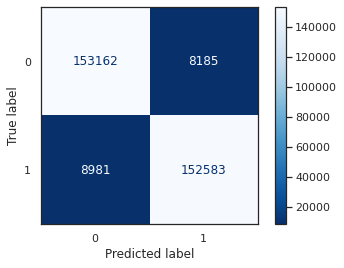

In [73]:
metrics.plot_confusion_matrix(lgbm_model,xTe,yTe,cmap='Blues_r')

In [74]:
propensity=round(pd.DataFrame(lgbm_model.predict_proba(xTe))[1],4)*100

In [75]:
Result=pd.DataFrame(lgbm_model.predict(xTe))

In [76]:
Result['Propensity']=propensity

In [77]:
Result.columns=['Predicted activation','Propensity']

In [78]:
Result

,Predicted activation,Propensity
0,1,76.68
1,1,99.97
2,1,100.00
3,0,29.46
4,0,0.03
...,...,...
322906,1,99.18
322907,0,0.01
322908,1,99.94
322909,0,1.28


In [79]:
playsound('/home/vikrant/Downloads/Notification.mp3')